# Redes Neuronales

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [168]:
ruta = "C:\\UNIR\\VIDAMA\\8. TFM\\DatosTFM\\EncuestaTratada-v5.xlsx"
estudiantes = pd.read_excel(ruta, header=0)


# Separar características (X) y clase (y)
X = estudiantes.iloc[:, :-1]  # Todas las columnas excepto la última
y = estudiantes.iloc[:, -1]   # Solo la última columna (la clase)


In [170]:
# Dividir el dataset en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
#Normalizar las características: Estandariza las variables de entrada para que tengan media 0 y desviación estándar 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [174]:
from tensorflow.keras.layers import Input  # Importar la capa de entrada


# Crear el modelo secuencial con dos capas ocultas
modelo = Sequential([
    Input(shape=(X_train.shape[1],)),  # Capa de entrada
    Dense(32, activation='relu'),      # Primera capa oculta
    Dense(16, activation='relu'),      # Segunda capa oculta
    Dense(len(np.unique(y_train)), activation='softmax')  # Capa de salida
])

'''
# Crear el modelo con más capas ocultas
modelo = Sequential([
    Input(shape=(X_train.shape[1],)),  # Capa de entrada (número de características)
    Dense(128, activation='relu'),     # Primera capa oculta con 128 neuronas
    Dense(64, activation='relu'),      # Segunda capa oculta con 64 neuronas
    Dense(32, activation='relu'),      # Tercera capa oculta con 32 neuronas
    Dense(16, activation='relu'),      # Cuarta capa oculta con 16 neuronas
    Dense(len(np.unique(y_train)), activation='softmax')  # Capa de salida (una neurona por clase)
])


# Reduce el sobreajuste desactivando aleatoriamente neuronas durante el entrenamiento.
from tensorflow.keras.layers import Dropout

modelo = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Desactiva el 30% de las neuronas de esta capa
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])
'''
# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [176]:
# Entrenar el modelo
historial = modelo.fit(
    X_train, 
    y_train, 
    epochs=50,         # Número de iteraciones (epocas) completas sobre los datos,  el modelo verá los datos 50 veces.
    batch_size=32,     # Tamaño del lote
    validation_split=0.2  # Usar el 20% del entrenamiento como validación
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4750 - loss: 0.7384 - val_accuracy: 0.6269 - val_loss: 0.6740
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6307 - loss: 0.6489 - val_accuracy: 0.7313 - val_loss: 0.6156
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7239 - loss: 0.5805 - val_accuracy: 0.7761 - val_loss: 0.5925
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7586 - loss: 0.5490 - val_accuracy: 0.7910 - val_loss: 0.5860
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7664 - loss: 0.5410 - val_accuracy: 0.7910 - val_loss: 0.5829
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7839 - loss: 0.4996 - val_accuracy: 0.7910 - val_loss: 0.5809
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7795 - loss: 0.5093 - val_accuracy: 0.7910 - val_loss: 0.5797
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8166 - loss: 0.4559 - val_accuracy: 0.7761 - val_loss: 0.5786
Epoch 9

In [178]:
# Evaluar el modelo con los datos de prueba
resultados = modelo.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", resultados[0])
print("Precisión en el conjunto de prueba:", resultados[1])


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.7933 - loss: 0.5418
Pérdida en el conjunto de prueba: 0.5285418033599854
Precisión en el conjunto de prueba: 0.7976190447807312


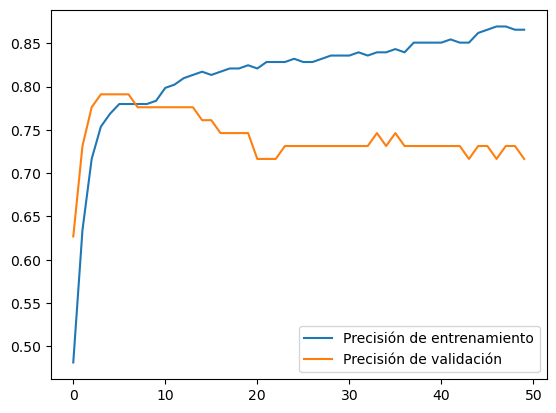

In [180]:
import matplotlib.pyplot as plt

plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.legend()
plt.show()


In [184]:
# Crear una muestra ficticia
# nueva_muestra = np.array([[4,1,3,1,0,3,1,4,0,1,1,0,0,0,0,1,1,0,0]])  # Clase 1
# nueva_muestra = np.array([[4,1,4,1,0,4,3,4,0,0,1,0,0,0,0,0,1,0,0]])  # clase 0

# nueva_muestra = np.array([[2,1,2,1,0,3,0,4,0,1,1,0,0,0,0,1,1,0,0]])  # clase 0
nueva_muestra = np.array([[1,1,3,1,0,3,2,4,0,1,0,0,0,0,0,0,0,0,5]])  # clase 1

nueva_muestra = scaler.transform(nueva_muestra)  # Normalizar la muestra

# Predecir la clase
prediccion = modelo.predict(nueva_muestra)
print("Distribución de probabilidades:", prediccion)
print("Clase predicha:", np.argmax(prediccion))  # Índice de la clase con mayor probabilidad



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Distribución de probabilidades: [[0.05612051 0.9438795 ]]
Clase predicha: 1


C:\Users\DELL CI5\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [186]:
import pandas as pd

# Verifica el balance de las clases en los datos de entrenamiento
print("Distribución de clases en el conjunto de entrenamiento:")
print(pd.Series(y_train).value_counts())

# Verifica el balance de las clases en los datos de prueba
print("\nDistribución de clases en el conjunto de prueba:")
print(pd.Series(y_test).value_counts())


Distribución de clases en el conjunto de entrenamiento:
Deserto
0    257
1     78
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
Deserto
0    63
1    21
Name: count, dtype: int64


# Otras metricas de analisis 

In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Obtener predicciones del modelo
y_pred = modelo.predict(X_test)


# Convertir probabilidades en etiquetas (seleccionando la clase con mayor probabilidad)
y_pred_classes = y_pred.argmax(axis=1)  # Convierte (84,2) → (84,)

# Verificar formas después de la conversión
print(f"Forma de y_test: {y_test.shape}")  
print(f"Forma de y_pred_classes: {y_pred_classes.shape}")

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Mostrar reporte de clasificación
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_classes))



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Forma de y_test: (84,)
Forma de y_pred_classes: (84,)
Accuracy: 0.7976
Precision: 0.8333
Recall: 0.2381
F1-score: 0.3704

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        63
           1       0.83      0.24      0.37        21

    accuracy                           0.80        84
   macro avg       0.81      0.61      0.62        84
weighted avg       0.80      0.80      0.75        84



In [166]:
print(f"Forma de y_test: {y_test.shape}")  
print(f"Forma de y_pred_classes: {y_pred_classes.shape}")


Forma de y_test: (84,)
Forma de y_pred_classes: (84,)
